<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.228198,33.227790,34.572593,51.842332,5.809672,178.680585,176.889633,1.790952
1,0.0,1.0,78.781369,74.332126,41.372366,32.897456,9.368744,246.752061,241.864739,4.887322
2,0.0,2.0,59.283724,87.613162,90.528843,77.448479,3.974555,328.848763,323.910358,4.938405
3,0.0,3.0,71.446591,76.557031,21.616478,76.984655,6.774386,263.379140,262.042889,1.336251
4,0.0,4.0,40.315012,20.539061,51.619874,44.130465,-2.984665,163.619747,168.621356,-5.001608
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.017370,26.726386,33.032734,39.655025,7.782931,200.214445,197.355461,2.858984
19996,999.0,16.0,71.337376,35.151429,61.211066,54.482492,1.660772,233.843134,233.058066,0.785068
19997,999.0,17.0,64.902754,47.886076,52.276926,37.102049,1.912013,214.079818,214.930840,-0.851022
19998,999.0,18.0,78.335262,37.878601,44.792594,55.787312,5.969188,232.762956,228.385454,4.377502


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.228198  33.227790  34.572593  51.842332  5.809672  178.680585   
      1.0    78.781369  74.332126  41.372366  32.897456  9.368744  246.752061   
      2.0    59.283724  87.613162  90.528843  77.448479  3.974555  328.848763   
      3.0    71.446591  76.557031  21.616478  76.984655  6.774386  263.379140   
      4.0    40.315012  20.539061  51.619874  44.130465 -2.984665  163.619747   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.017370  26.726386  33.032734  39.655025  7.782931  200.214445   
      16.0   71.337376  35.151429  61.211066  54.482492  1.660772  233.843134   
      17.0   64.902754  47.886076  52.276926  37.102049  1.912013  214.079818   
      18.0   78.335262  37.878601  44.792594  55.787312  5.969188  232.762956   
      19.0   41.284838  32.706008  99.522400  30.947179 -3.940532  210.519894   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    176.889633  1.790952  
      1.0    241.864739  4.887322  
      2.0    323.910358  4.938405  
      3.0    262.042889  1.336251  
      4.0    168.621356 -5.001608  
...                 ...       ...  
999.0 15.0   197.355461  2.858984  
      16.0   233.058066  0.785068  
      17.0   214.930840 -0.851022  
      18.0   228.385454  4.377502  
      19.0   215.765948 -5.246054  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.228198  33.227790  34.572593  51.842332  5.809672  178.680585   
      1.0    78.781369  74.332126  41.372366  32.897456  9.368744  246.752061   
      2.0    59.283724  87.613162  90.528843  77.448479  3.974555  328.848763   
      3.0    71.446591  76.557031  21.616478  76.984655  6.774386  263.379140   
      4.0    40.315012  20.539061  51.619874  44.130465 -2.984665  163.619747   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.017370  26.726386  33.032734  39.655025  7.782931  200.214445   
      16.0   71.337376  35.151429  61.211066  54.482492  1.660772  233.843134   
      17.0   64.902754  47.886076  52.276926  37.102049  1.912013  214.079818   
      18.0   78.335262  37.878601  44.792594  55.787312  5.969188  232.762956   
      19.0   41.284838  32.706008  99.522400  30.947179 -3.940532  210.519894   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    176.889633  1.790952  
      1.0    241.864739  4.887322  
      2.0    323.910358  4.938405  
      3.0    262.042889  1.336251  
      4.0    168.621356 -5.001608  
...                 ...       ...  
999.0 15.0   197.355461  2.858984  
      16.0   233.058066  0.785068  
      17.0   214.930840 -0.851022  
      18.0   228.385454  4.377502  
      19.0   215.765948 -5.246054  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.228198,33.227790,34.572593,51.842332,5.809672,178.680585,176.889633,1.790952
1,0.0,1.0,78.781369,74.332126,41.372366,32.897456,9.368744,246.752061,241.864739,4.887322
2,0.0,2.0,59.283724,87.613162,90.528843,77.448479,3.974555,328.848763,323.910358,4.938405
3,0.0,3.0,71.446591,76.557031,21.616478,76.984655,6.774386,263.379140,262.042889,1.336251
4,0.0,4.0,40.315012,20.539061,51.619874,44.130465,-2.984665,163.619747,168.621356,-5.001608
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.017370,26.726386,33.032734,39.655025,7.782931,200.214445,197.355461,2.858984
19996,999.0,16.0,71.337376,35.151429,61.211066,54.482492,1.660772,233.843134,233.058066,0.785068
19997,999.0,17.0,64.902754,47.886076,52.276926,37.102049,1.912013,214.079818,214.930840,-0.851022
19998,999.0,18.0,78.335262,37.878601,44.792594,55.787312,5.969188,232.762956,228.385454,4.377502


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.228198  33.227790  34.572593  51.842332  5.809672  178.680585   
      1.0    78.781369  74.332126  41.372366  32.897456  9.368744  246.752061   
      2.0    59.283724  87.613162  90.528843  77.448479  3.974555  328.848763   
      3.0    71.446591  76.557031  21.616478  76.984655  6.774386  263.379140   
      4.0    40.315012  20.539061  51.619874  44.130465 -2.984665  163.619747   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.017370  26.726386  33.032734  39.655025  7.782931  200.214445   
      16.0   71.337376  35.151429  61.211066  54.482492  1.660772  233.843134   
      17.0   64.902754  47.886076  52.276926  37.102049  1.912013  214.079818   
      18.0   78.335262  37.878601  44.792594  55.787312  5.969188  232.762956   
      19.0   41.284838  32.706008  99.522400  30.947179 -3.940532  210.519894   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    176.889633  1.790952  
      1.0    241.864739  4.887322  
      2.0    323.910358  4.938405  
      3.0    262.042889  1.336251  
      4.0    168.621356 -5.001608  
...                 ...       ...  
999.0 15.0   197.355461  2.858984  
      16.0   233.058066  0.785068  
      17.0   214.930840 -0.851022  
      18.0   228.385454  4.377502  
      19.0   215.765948 -5.246054  

[20000 rows x 8 columns]

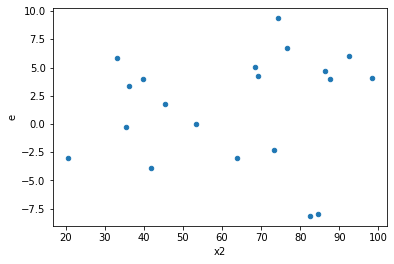

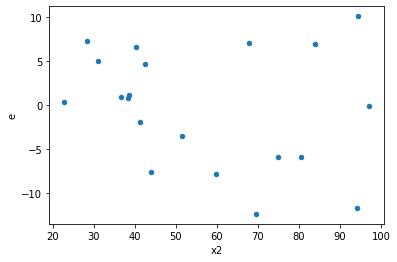

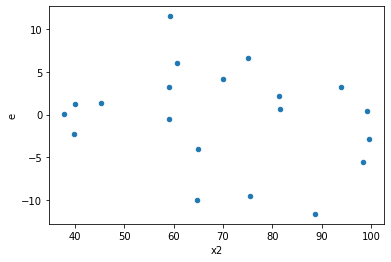

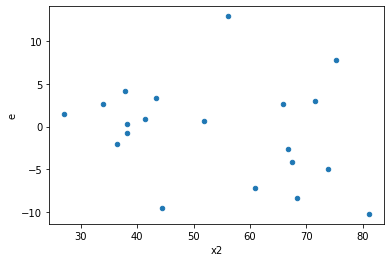

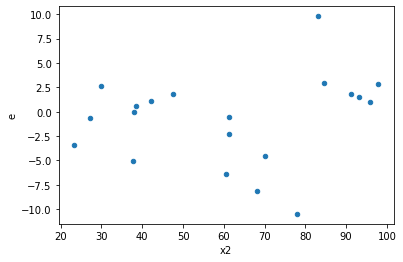

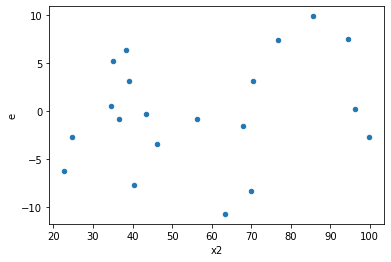

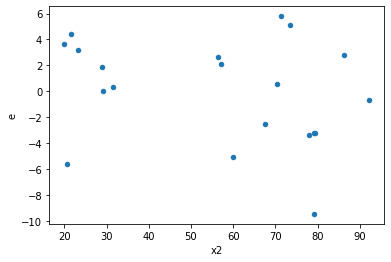

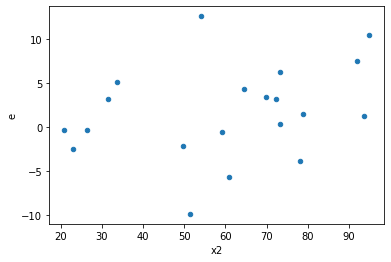

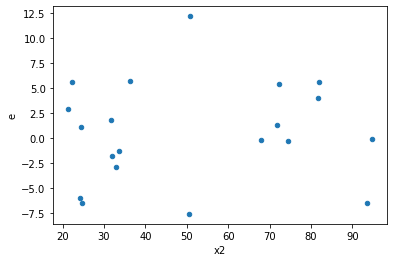

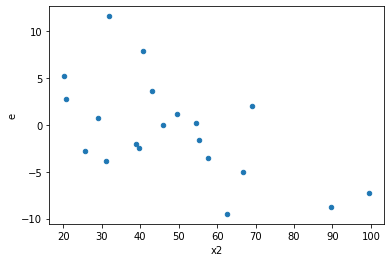

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,10.0,786.613897546619,7257.821220539918,131.10231625776984,725.7821220539918,5.535997705997646,0.0181829729488705,0.9909085135255647,0.00909148647443525,Reject001=1 : Homoscedasticity
1.0,10.0,6.0,2396.375457994825,2841.963774500764,239.6375457994825,473.66062908346066,1.9765710231392444,0.41777042953834354,0.7911147852308282,0.20888521476917177,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,2970.310185186099,4543.644032447683,424.330026455157,504.8493369386314,1.189756334606181,0.7893710680368271,0.6053144659815864,0.39468553401841355,Reject001=1 : Homoscedasticity
3.0,10.0,6.0,4582.577673344829,4630.0351174537045,458.25776733448293,771.6725195756175,1.6839267647641916,0.540794391150484,0.729602804424758,0.270397195575242,Reject001=1 : Homoscedasticity
4.0,5.0,11.0,4218.129224575418,9640.176918484545,843.6258449150837,876.3797198622314,1.0388251203357153,0.8844388760668553,0.5577805619665723,0.44221943803342767,Reject001=1 : Homoscedasticity
5.0,5.0,11.0,699.4217609839908,7543.073927323758,139.88435219679815,685.7339933930689,4.902149401445095,0.02653178503592768,0.9867341074820362,0.01326589251796384,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,5436.090477664668,8269.900991396324,679.5113097080834,1033.7376239245405,1.5212956858196103,0.5665623979904626,0.7167188010047687,0.2832811989952313,Reject001=1 : Homoscedasticity
7.0,10.0,6.0,9082.470828533456,6833.406204816475,908.2470828533457,1138.9010341360793,1.2539550697571327,0.8140176877632568,0.5929911561183716,0.4070088438816284,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,3634.278699094934,6051.160319715294,454.28483738686674,756.3950399644117,1.6650237421863794,0.48687570429237037,0.7565621478538148,0.24343785214618519,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,10.0,786.613897546619,7257.821220539918,131.10231625776984,725.7821220539918,5.535997705997646,0.0181829729488705,Reject001=1 : Homoscedasticity
1.0,10.0,6.0,2396.375457994825,2841.963774500764,239.6375457994825,473.66062908346066,1.9765710231392444,0.41777042953834354,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,2970.310185186099,4543.644032447683,424.330026455157,504.8493369386314,1.189756334606181,0.7893710680368271,Reject001=1 : Homoscedasticity
3.0,10.0,6.0,4582.577673344829,4630.0351174537045,458.25776733448293,771.6725195756175,1.6839267647641916,0.540794391150484,Reject001=1 : Homoscedasticity
4.0,5.0,11.0,4218.129224575418,9640.176918484545,843.6258449150837,876.3797198622314,1.0388251203357153,0.8844388760668553,Reject001=1 : Homoscedasticity
5.0,5.0,11.0,699.4217609839908,7543.073927323758,139.88435219679815,685.7339933930689,4.902149401445095,0.02653178503592768,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,5436.090477664668,8269.900991396324,679.5113097080834,1033.7376239245405,1.5212956858196103,0.5665623979904626,Reject001=1 : Homoscedasticity
7.0,10.0,6.0,9082.470828533456,6833.406204816475,908.2470828533457,1138.9010341360793,1.2539550697571327,0.8140176877632568,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,3634.278699094934,6051.160319715294,454.28483738686674,756.3950399644117,1.6650237421863794,0.48687570429237037,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      942
Reject001=0 : Heteroscedasticity     58
Name: Result_test, dtype: int64